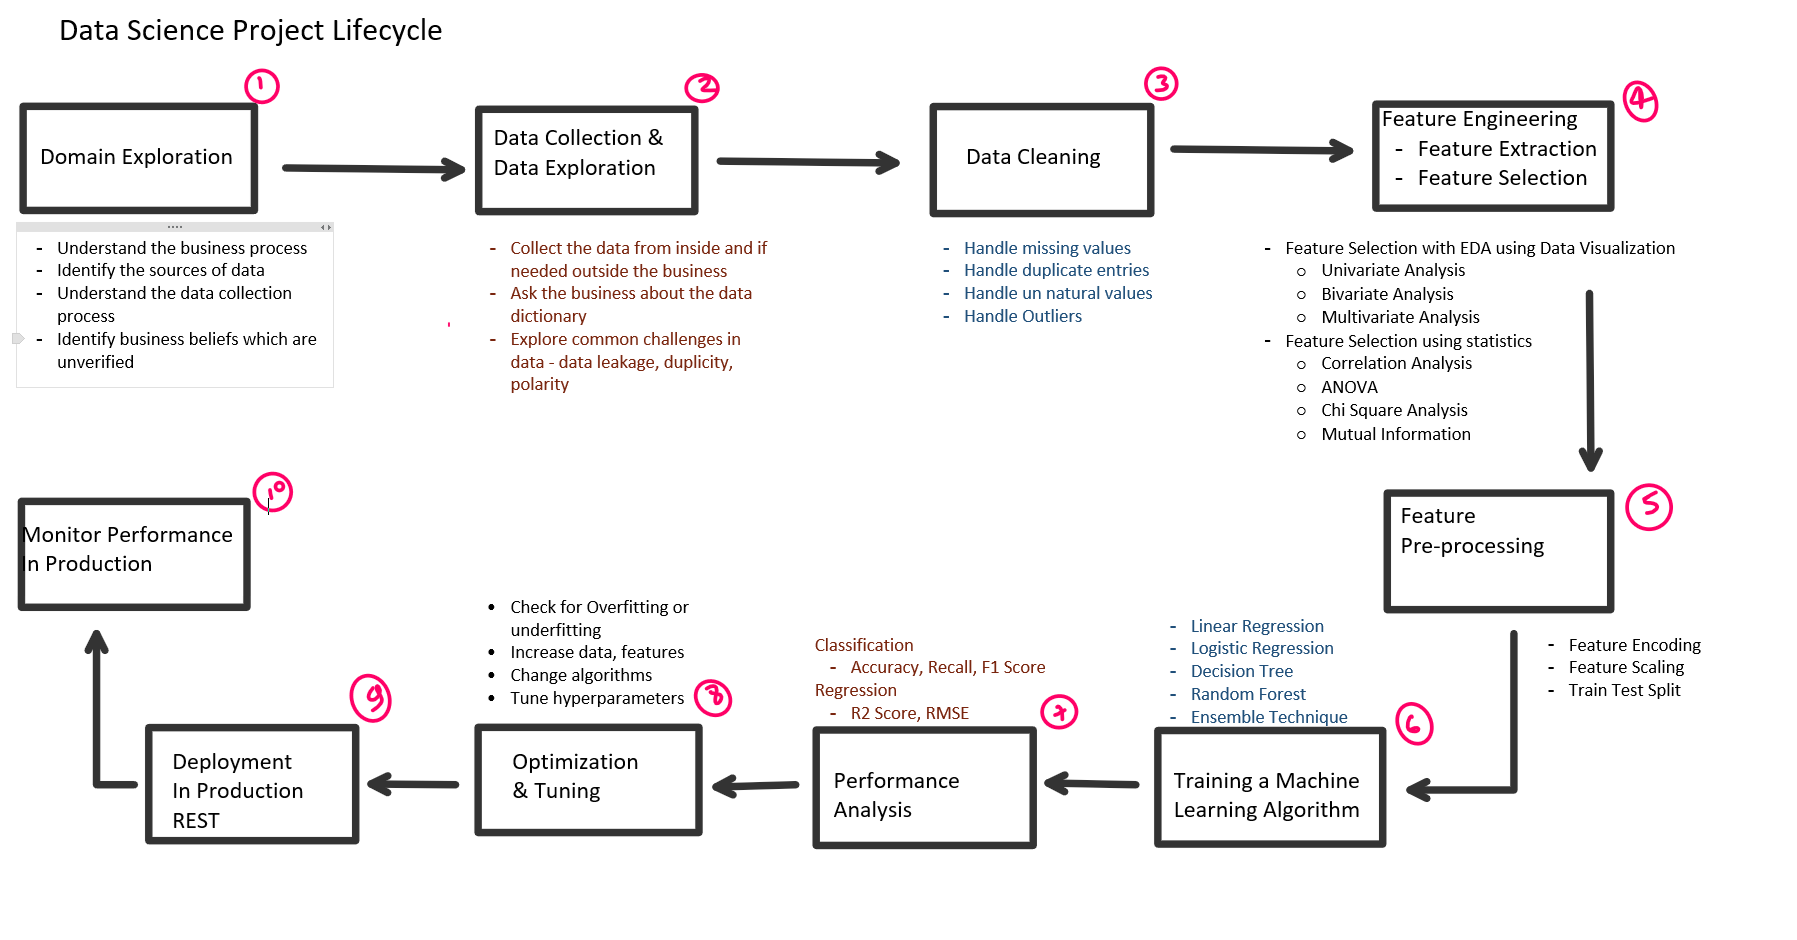

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel(r"C:\Users\idrus\bootup\BootUP-DS-ML\Datasets\Folds5x2_pp.xlsx")
df.shape

(9568, 5)

### 2. Data Exploration

In [4]:
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [6]:
df.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


### 3. Data Cleaning

In [7]:
# check for missing values
df.isnull().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [8]:
# check for duplicates
df.duplicated().sum()

41

In [9]:
# drop the duplicated rows
print(df.shape)
df.drop_duplicates(inplace=True)
print(df.shape)

(9568, 5)
(9527, 5)


In [10]:
# check for outliers
# below -1 or above +1 we should handle
df.skew()

AT   -0.136107
V     0.196819
AP    0.273846
RH   -0.435138
PE    0.305791
dtype: float64

### 4. Feature Engineering

#### Correlation Analysis

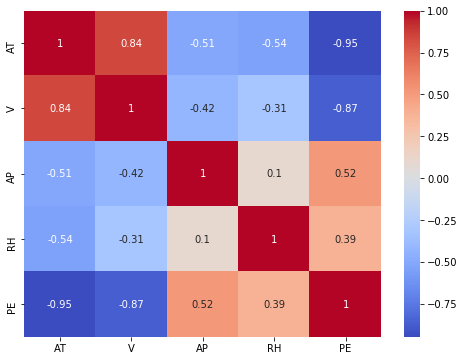

In [11]:
cor = df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(cor,annot=True,cmap='coolwarm')
plt.show()

- if corr > +0.5 = Very Good
- if corr is between +0.1 to +.5 = Good
- if corr < -0.5 = Very Good
- if corr is between -0.1 to -0.5 = Good

- if corr is between -0.1 to +0.1 = bad

##### ANOVA - analysis of variance - F Test
    - it is used to compare the distributin of a variable in two or more groups
    - for example - comparing distribution of age of customers for groups exited = 1 & exited = 0
    
- Ho = Null Hypothesis = distribution of variable in two/more groups is uniform
- Ha = Alternate Hypothesis = distribution of the variable in two/more groups in not uniform

We always analyse the pvalue, consider for 95% confidence interval, signifcance = 5% = 0.05

    - if pvalue >0.05 = accept the Null hypothesis - feature is not important
    - if pvalue <0.05 = reject the Null hypothesis - feature is important

In [13]:
x = df[['AT',"V","RH","AP"]]
y = df['PE']
from sklearn.feature_selection import f_regression
fval,pval = f_regression(x,y)
for i in range(len(x.columns)):print(x.columns[i],pval[i])

AT 0.0
V 0.0
RH 0.0
AP 0.0


In [14]:
df.columns

Index(['AT', 'V', 'AP', 'RH', 'PE'], dtype='object')

In [15]:
# selecting the best features
x = df[['AT', 'V', 'AP', 'RH']]
y = df['PE']

## 5. Preprocessing

In [16]:
x.head()

,AT,V,AP,RH
0,14.96,41.76,1024.07,73.17
1,25.18,62.96,1020.04,59.08
2,5.11,39.40,1012.16,92.14
3,20.86,57.32,1010.24,76.64
4,10.82,37.50,1009.23,96.62


In [17]:
# split data into train and test set
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=5)
print(x.shape)
print(xtrain.shape)
print(xtest.shape)
print(y.shape)
print(ytrain.shape)
print(ytest.shape)

(9527, 4)
(7621, 4)
(1906, 4)
(9527,)
(7621,)
(1906,)


## 6. Apply machine learning algorithm - Linear Regression

In [18]:

from sklearn.linear_model import LinearRegression
model = LinearRegression()
# train the model using train data
model.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## 7. Performance Analysis

In [22]:
newdata = [[22.1,71.29,1008.2,75.38]]
model.predict(newdata)

array([444.9563843])

In [26]:
from sklearn import metrics
ypred = model.predict(xtest)
metrics.r2_score(ytest,ypred)

0.9302847464353334

In [31]:
# RMSE to check the actual value, in this case RMS +-5
# So, if act value is 440, pred will be 440 +-5 value
mse = metrics.mean_squared_error(ytest,ypred)
print("MSE ", mse)
print("RMSE ", np.sqrt(mse))

MSE  20.518879934798218
RMSE  4.529777029258528


In [27]:
# export the model as pickle file
import joblib
joblib.dump(model,"ccpp_model.pkl")

['ccpp_model.pkl']